In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

file_path = '../0.datasets/drug200.csv'

df = pd.read_csv(file_path)

print(df.info())
print(df.describe())
print(df.isnull().sum()) 

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


Modello addestrato con successo!
1.0
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]


<Axes: >

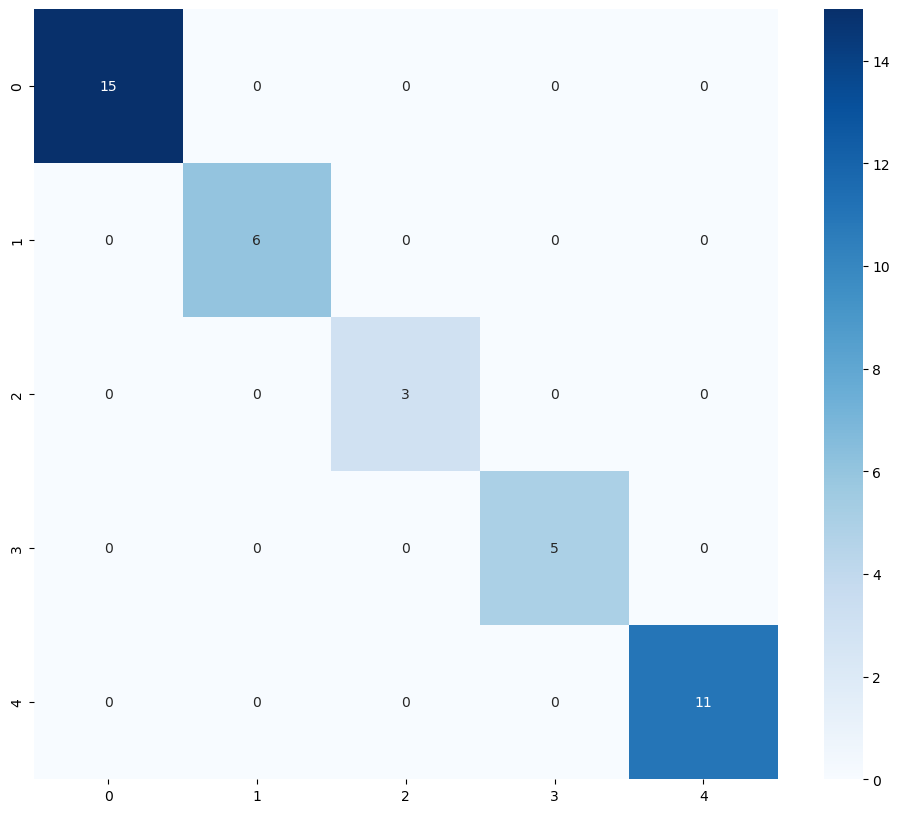

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Inizializzazione degli encoder e scaler
lab_encoder = LabelEncoder()
mm_scaler = MinMaxScaler()

# Lista delle feature categoriche
featureStringate = ['Sex', 'BP', 'Cholesterol']

# Codifica delle feature categoriche
for feature in featureStringate:
    df[feature] = lab_encoder.fit_transform(df[feature])

# Codifica della colonna target 'Drug'
df['Drug'] = lab_encoder.fit_transform(df['Drug'])

# Separa la colonna target
y = df['Drug']

# Applica lo scaling solo sulle feature (escludendo 'Drug')
features = df.drop(columns='Drug')
features_scaled = pd.DataFrame(mm_scaler.fit_transform(features), columns=features.columns)

# Definizione delle variabili X (feature) e y (target)
X = features_scaled

# Suddivisione del dataset in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Creazione e addestramento del modello Decision Tree
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

# Verifica dell'addestramento
print("Modello addestrato con successo!")

y_pred = model_dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize =(12,10))
sns.heatmap(cm, cmap='Blues', fmt="d", annot=True)


In [13]:
scores = cross_val_score(model_dtc, X, y, cv=10)
print(scores.mean(), scores.std())


0.985 0.02291287847477922


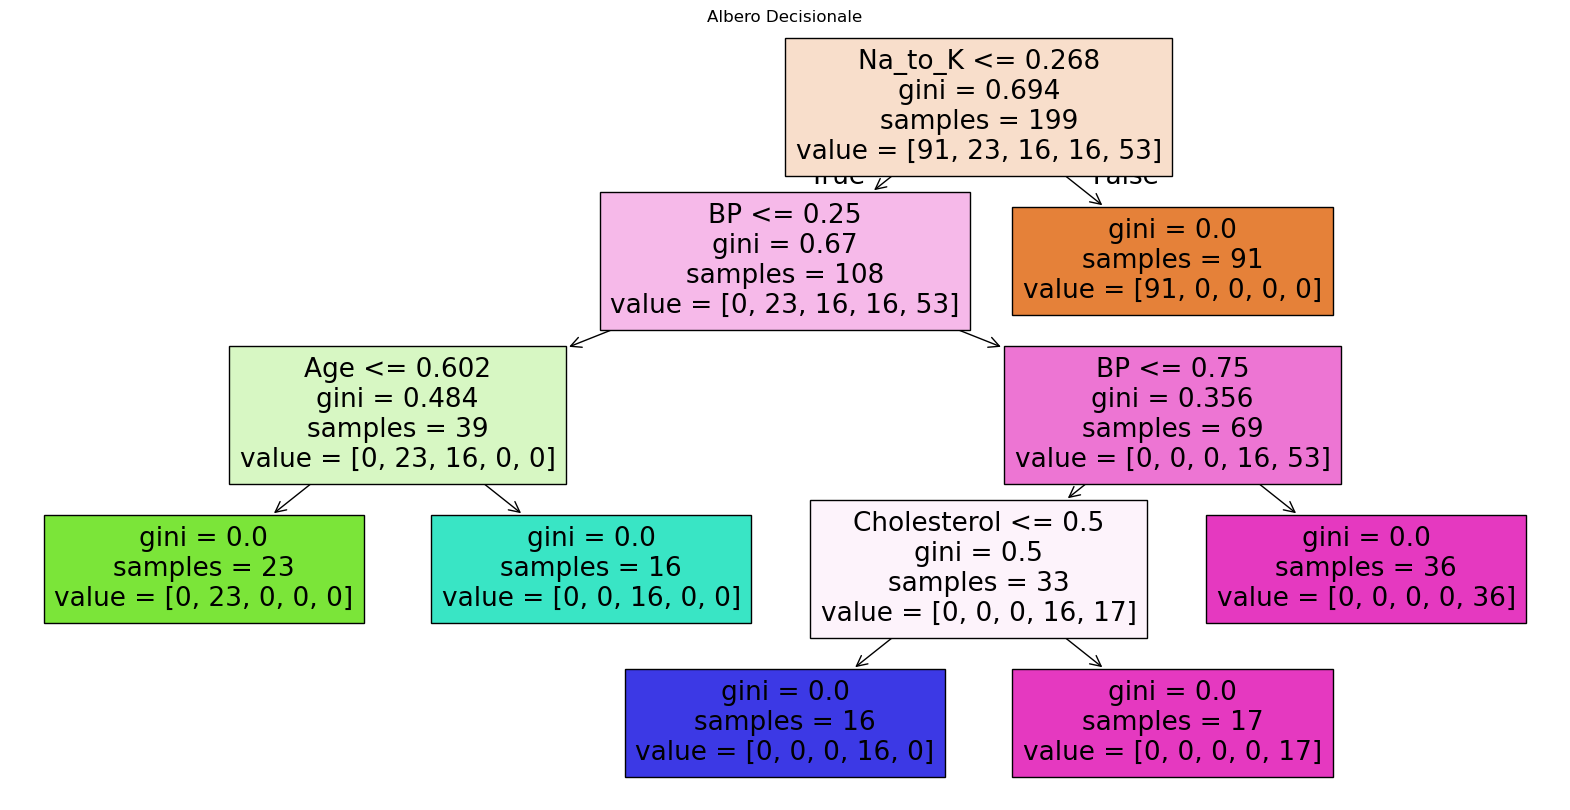

In [21]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model_dtc, feature_names=X.columns, filled=True)
plt.title("Albero Decisionale")
plt.show()